In [14]:
#import tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns 
from sklearn.linear_model import LogisticRegression

In [2]:
#Q3 codes
#a. 
import pandas as pd#import tool
dataset = pd.read_csv('e:/890/student_results.csv')

In [3]:
#b. 
pd.isna(dataset) #checking if there was any NA
dataset.fillna(0)#if so replace these with zeroes


,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category
0,54002768,17.21,24.19,0.00,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic
1,54005658,66.50,0.00,22.00,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic
2,54010438,0.00,0.00,0.00,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international
3,54011658,60.67,29.07,27.50,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic
4,54012789,37.33,29.01,11.00,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic
5,54013792,47.44,27.23,15.00,18.71,19.88,0.00,27.00,0.00,48.22,27.76,47.5,0.00,45,21,cl21tg10,international
6,54018502,69.30,26.83,25.00,17.76,24.00,15.70,23.57,0.00,63.78,24.42,50.0,1.62,68,3,cl3tg6,international
7,54020391,66.89,0.00,24.00,19.50,28.00,18.15,29.00,0.00,66.35,0.00,30.0,0.94,35,21,cl21tg3,international
8,54020678,19.25,27.12,10.50,19.31,18.38,19.49,23.00,19.15,31.06,28.22,10.0,2.00,33,8,cl8tg5,domestic
9,54030996,0.00,28.17,0.00,0.00,0.00,15.98,25.29,16.50,15.56,0.00,32.5,2.00,10,4,cl4tg7,international


In [4]:
#c. 
#Codes:
#deriveing new variable
dataset['Total.marks'] = dataset['Assessment 1']/70*7 +dataset['Assessment 2']/30*3+dataset['Assessment 3']/70*7+dataset['Assessment 4']/30*3+dataset['Online quiz 1 ']/30*3+dataset['Online quiz 2']/20*2+dataset['Online quiz 3']/30*3+dataset['Online quiz 4']/20*2+dataset['Group assignment 1']/30*2.4+dataset['Group assignment 2']/20*1.6+dataset['Group assignment 3']/50*4+dataset[' Group evaluation']/2*2+dataset['Final exam']/100*60
dataset.ix[0:1,['Total.marks']] #displaying first 2 rows to check


C:\Users\xiao\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


,Total.marks
0,57.0576
1,70.2472


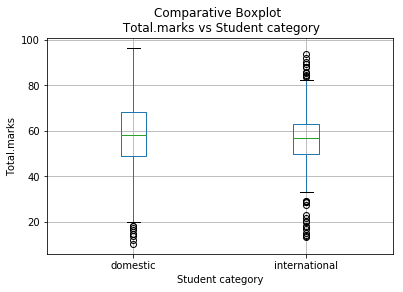

In [5]:
#Boxplot:
import matplotlib.pyplot as plt #import tool
dataset.boxplot(column="Total.marks",by="Student category")#define elements of boxplot
plt.title('Comparative Boxplot \n Total.marks vs Student category')#give title
plt.suptitle("")#delete original title
plt.xlabel('Student category')#give x-axis lable
plt.ylabel('Total.marks')#give y-axis lable
plt.show() #display


In [6]:
#d. 
#Codes:
#derive mean, variance and SE:
dataset['y']=dataset['Total.marks'] #make a duplicate total.mark
m = dataset.groupby(['Class No']).y.mean()#calculate mean by class number
v = dataset.groupby(['Class No']).y.var()#calculate variance by class number
s = dataset.groupby(['Class No']).y.std()#calculate SE by class number
#merge results as a data set
df=pd.DataFrame()
df['Mean']=m
df['Var']=v
df['SE']=s
df.to_pickle("e:\\890\\stat")#save as stat.table file
df


,Mean,Var,SE
Class No,,,
1,59.280813,242.710561,15.579171
2,60.671069,160.151821,12.655110
3,57.610713,273.495919,16.537712
4,56.220069,319.034109,17.861526
5,57.918085,383.676678,19.587666
6,62.332600,252.025294,15.875305
7,54.879626,344.554792,18.562187
8,54.384800,358.580091,18.936211
9,53.918419,205.356479,14.330264


In [7]:
#read back to check
stat= pd.read_pickle("e:\\890\\stat.table")
stat


,Mean,Var,SE
Class No,,,
1,59.280813,242.710561,15.579171
2,60.671069,160.151821,12.655110
3,57.610713,273.495919,16.537712
4,56.220069,319.034109,17.861526
5,57.918085,383.676678,19.587666
6,62.332600,252.025294,15.875305
7,54.879626,344.554792,18.562187
8,54.384800,358.580091,18.936211
9,53.918419,205.356479,14.330264


In [8]:
#e. 
#Code:
#derive variable and give labels.
bin = [0,50,65,75,85,100]#set bins to separate data
lab=["F","P","Cr","D","HD" ]
cate = pd.cut(dataset['Total.marks'],bins=bin, labels=lab)
cate = cate.to_frame()#convert to data frame
dataset['Grade']=cate #merge in dataset
dataset.head() #display to check


,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,Assessment 4,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total.marks,y,Grade
0,54002768,17.21,24.19,0.0,0.00,15.00,18.92,26.57,0.00,0.00,0.00,50.0,2.00,69,9,cl9tg2,domestic,57.0576,57.0576,P
1,54005658,66.50,0.00,22.0,18.14,29.00,19.91,22.35,17.04,60.54,24.07,42.5,1.88,63,2,cl2tg8,domestic,70.2472,70.2472,Cr
2,54010438,0.00,0.00,0.0,0.00,4.13,0.00,18.86,0.00,43.75,0.00,22.5,0.00,15,3,cl3tg7,international,17.0968,17.0968,F
3,54011658,60.67,29.07,27.5,18.40,24.50,18.52,25.00,19.29,66.11,27.61,35.0,1.72,75,20,cl20tg2,domestic,80.3012,80.3012,D
4,54012789,37.33,29.01,11.0,20.00,19.50,19.10,27.75,17.82,55.61,19.21,42.5,2.00,33,19,cl19tg6,domestic,49.9216,49.9216,F


In [9]:
#f. 
#Code:
#fit the simple linear regression
from sklearn.linear_model import LinearRegression #import tool
est = LinearRegression(fit_intercept = True) 
#call simple linear regression function with intercept
y = dataset ['Total.marks'] #assign y value
x = dataset [['Assessment 1']]#assign x value
est.fit(x, y) #fit model
from sklearn import metrics #import tool
y_hat = est.predict(x) #get fitted value

print ("Coefficients:", est.coef_) #report Coefficients
print ("Intercept:", est.intercept_)#report Intercept
print ("Model Equation: ")
print ("Estimated Total.mark = %.4f + %.4f*Assessment1" %(est.intercept_, est.coef_))
print ("MSE:", metrics.mean_squared_error(y, y_hat))
#report MSE, R^2 and variance
print ("R^2:", metrics.r2_score(y, y_hat))
print ('var:', y.var())


Coefficients: [0.38884655]
Intercept: 39.038035902298375
Model Equation: 
Estimated Total.mark = 39.0380 + 0.3888*Assessment1
MSE: 183.21641521170605
R^2: 0.2769117799044609
var: 253.81957953823743


Text(0.5,1,'Simple Linear Regression')

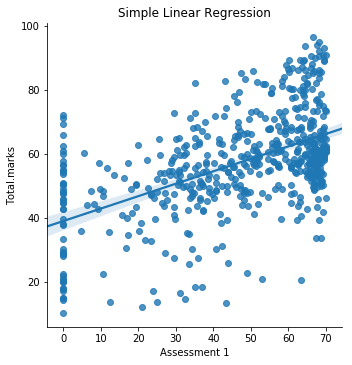

In [10]:
import seaborn as sns
#plot regression fit
sns.lmplot("Assessment 1", "Total.marks", dataset , order = 1)
ax = plt.gca()#add title
ax.set_title("Simple Linear Regression")


In [11]:
#g. 
#Codes:
#fit multiple linear regression
y_data = dataset ['Total.marks'] #assign y value
x_data = dataset [['Assessment 1', 'Assessment 3', 'Online quiz 1 ','Group assignment 2']] #assign x value
regr = LinearRegression () #call model
regr.fit(x_data , y_data) #fit model
y_hat = regr.predict(x_data) #get fitted value
#report results
print ('Coeff and intercept:', regr.coef_ , regr.intercept_)
print ("MSE:", metrics.mean_squared_error(y_data, y_hat))
#report MSE, R^2 and variance
print ("R^2:", metrics.r2_score(y_data, y_hat))
print ('var:', y.var())


Coeff and intercept: [0.21419212 0.26737389 0.30040848 0.44954865] 23.38356395096376
MSE: 130.62555696782835
R^2: 0.484468673957438
var: 253.81957953823743


In [12]:
#h. 
#Code:
#deriving Status
t=dataset['Grade']#geting Grade as a string
dataset['Status']=t.replace({"F":"Incomplete", "P":"Complete", "Cr":"Complete", "D":"Complete", "HD":"Complete"})
#recode variable as a new variable
dataset.head()#check the new variable


,ID number,Assessment 1,Assessment 2,Online quiz 1,Online quiz 2,Online quiz 3,Online quiz 4,Group assignment 1,Group assignment 2,Assessment 3,...,Group assignment 3,Group evaluation,Final exam,Class No,groupname,Student category,Total.marks,y,Grade,Status
0,54002768,17.21,24.19,0.0,0.00,15.00,18.92,26.57,0.00,0.00,...,50.0,2.00,69,9,cl9tg2,domestic,57.0576,57.0576,P,Complete
1,54005658,66.50,0.00,22.0,18.14,29.00,19.91,22.35,17.04,60.54,...,42.5,1.88,63,2,cl2tg8,domestic,70.2472,70.2472,Cr,Complete
2,54010438,0.00,0.00,0.0,0.00,4.13,0.00,18.86,0.00,43.75,...,22.5,0.00,15,3,cl3tg7,international,17.0968,17.0968,F,Incomplete
3,54011658,60.67,29.07,27.5,18.40,24.50,18.52,25.00,19.29,66.11,...,35.0,1.72,75,20,cl20tg2,domestic,80.3012,80.3012,D,Complete
4,54012789,37.33,29.01,11.0,20.00,19.50,19.10,27.75,17.82,55.61,...,42.5,2.00,33,19,cl19tg6,domestic,49.9216,49.9216,F,Incomplete


In [15]:
#Logistic Regression
import numpy as np
xSta=dataset [['Assessment 3']]#getting x.data
ySta=dataset ['Status']#getting y.data
x_train = xSta[:100]#getting training set of x
y_train= ySta[:100]#getting training set of y
x_test=xSta[100:200]#testing set
print ('Training set sizes:', x_train.shape[0])
#fit model
logreg = LogisticRegression ()
logreg.fit(x_train, y_train)
#report reults
print ('Coeff and Intercept:', logreg.coef_ ,logreg.intercept_)

#predicted values
pred1 = logreg.predict(x_test)

#confusion matrix
from sklearn import metrics
c_m=metrics.confusion_matrix(y_train,pred1)
print ('Confusion Matrix by Texting set:')
print (c_m)


Training set sizes: 100
Coeff and Intercept: [[-0.04515084]] [1.09413416]
Confusion Matrix by Texting set:
[[63  6]
 [28  3]]
